In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/drug200.csv")

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.shape

(200, 6)

In [6]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [7]:
def drug_letter(drug):
  return drug[-1]

In [8]:
df['Drug']=df['Drug'].apply(lambda x:drug_letter(x))

In [9]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,Y
1,47,M,LOW,HIGH,13.093,C
2,47,M,LOW,HIGH,10.114,C
3,28,F,NORMAL,HIGH,7.798,X
4,61,F,LOW,HIGH,18.043,Y


EDA

In [18]:
df['Sex'].value_counts()

,count
Sex,
M,104
F,96


In [19]:
df['BP'].value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


In [20]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
HIGH,103
NORMAL,97


DECISION TREE BUILDING

In [21]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [11]:
X = df.drop(columns=['Drug'])

In [12]:
y= df['Drug']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.compose import ColumnTransformer
col_transformer = ColumnTransformer([
    ('scaler',StandardScaler(),['Age','Na_to_K']),
    ('oe',OrdinalEncoder(),['BP','Cholesterol']),
    ('ohe',OneHotEncoder(),['Sex'])
])

In [55]:
full_pipeline= Pipeline([
    ('preprocessor',col_transformer),
    ('decision_tree',DecisionTreeClassifier(max_depth=5,max_leaf_nodes=6))
])

In [56]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'Na_to_K']),
                                                 ('oe', OrdinalEncoder(),
                                                  ['BP', 'Cholesterol']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['Sex'])])),
                ('decision_tree',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6))])

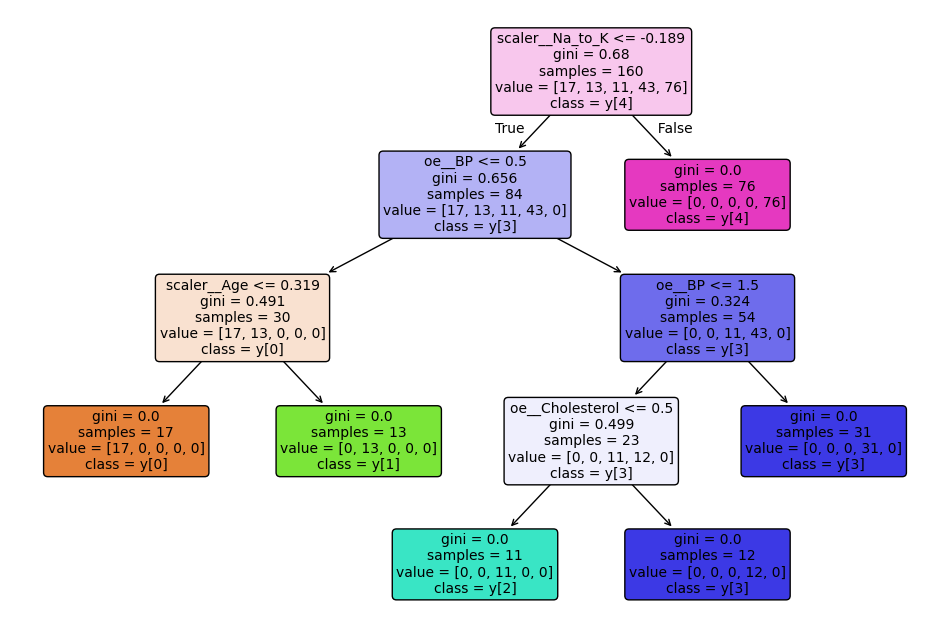

In [67]:
from sklearn.tree import plot_tree
model = full_pipeline.named_steps['decision_tree']
feature_names=full_pipeline.named_steps['preprocessor'].get_feature_names_out()
plt.figure(figsize=(12,8))
plot_tree(model,
          feature_names=feature_names,
          class_names=True,
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

In [57]:
full_pipeline.score(X_train,y_train)

1.0

In [58]:
y_pred=full_pipeline.predict(X_test)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         6
           B       1.00      1.00      1.00         3
           C       1.00      1.00      1.00         5
           X       1.00      1.00      1.00        11
           Y       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



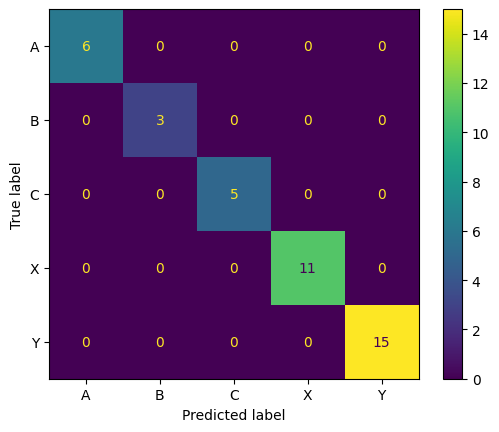

In [60]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm,display_labels=full_pipeline.classes_).plot()